In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


# Exercise 1

In [3]:
rf = 0.05
mu = 0.15
sigma = 0.25
V_0 = 100
T = 5
B = 50

### a)

In [4]:
def European_Call (S,K,t,T,q,r,sig):
    d1 = (np.log(S/K) + (r - q + sig**2/2) * (T-t))/(sig * np.sqrt((T-t)))
    d2 = d1 - sig * np.sqrt((T-t))
    return S * np.exp(-q * (T-t)) * stats.norm.cdf(d1) - K * np.exp(-r * (T-t)) * stats.norm.cdf(d2)

def Bond_Val(B,V,rf,T,t,sig,q):
    d1 = (np.log(V/B) + (rf - q + sig**2/2) * (T-t))/(sig * np.sqrt((T-t)))
    d2 = d1 - sig * np.sqrt((T-t))
    return np.exp(-rf * T) * B * stats.norm.cdf(d2) + V * stats.norm.cdf(-d1)
    

In [5]:
S_0 = European_Call(V_0,B,0,T,0,rf,sigma)
B_0 = Bond_Val(B,V_0,rf,T,0,sigma,0)

In [6]:
print('The value of equity is ' + str(np.round(S_0,2)))
print('The value of debt is ' + str(np.round(B_0,2)))

The value of equity is 61.7
The value of debt is 38.3


### b)

In [7]:
def Credit_Spread(t,T,L,sig,r):
    d1 = (-np.log(L) + (r + sig**2/2) * (T-t))/(sig * np.sqrt((T-t)))
    d2 = d1 - sig * np.sqrt((T-t))
    return -1/(T-t) * np.log(stats.norm.cdf(d2) + np.exp(r * T)/L * stats.norm.cdf(-d1))

In [8]:
def credit_spread(T,t,sigma,r,L):
    p0=np.exp(-r*(T-t))
    d1=(np.log(1/L)+(r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2=d1-sigma*np.sqrt(T-t)
    c=-1/(T-t)*np.log(stats.norm.cdf(d2)+1/(L*p0)*stats.norm.cdf(-d1))
    return c

In [9]:
x_T = np.linspace(0,20,1000)[1:]
cs_T3 = Credit_Spread(0,x_T,0.3,sigma,rf)
cs_T6 = Credit_Spread(0,x_T,0.6,sigma,rf)
cs_T9 = Credit_Spread(0,x_T,0.9,sigma,rf)

x_S = np.linspace(0,1,1000)[1:]
cs_S3 = Credit_Spread(0,T,0.3,x_S,rf)
cs_S6 = Credit_Spread(0,T,0.6,x_S,rf)
cs_S9 = Credit_Spread(0,T,0.9,x_S,rf)

Text(0, 0.5, 'Credit spread')

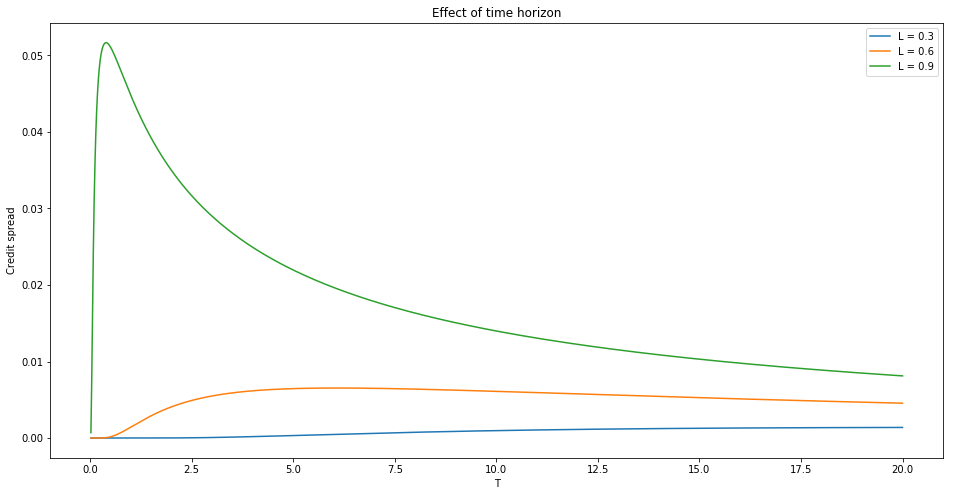

In [10]:
plt.figure(figsize = (16,8))
plt.plot(x_T , cs_T3,label = 'L = 0.3')
plt.plot(x_T,cs_T6,label = 'L = 0.6')
plt.plot(x_T,cs_T9,label = 'L = 0.9')
plt.legend()
plt.title('Effect of time horizon')
plt.xlabel('T')
plt.ylabel('Credit spread')


Text(0, 0.5, 'Credit spread')

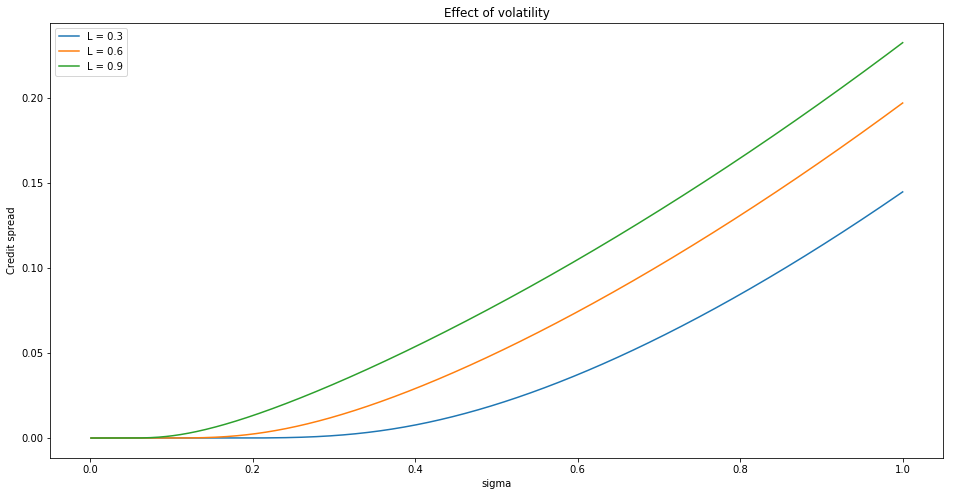

In [11]:

plt.figure(figsize = (16,8))
plt.plot(x_S , cs_S3,label = 'L = 0.3')
plt.plot(x_S,cs_S6,label = 'L = 0.6')
plt.plot(x_S,cs_S9,label = 'L = 0.9')
plt.legend()
plt.title('Effect of volatility')
plt.xlabel('sigma')
plt.ylabel('Credit spread')


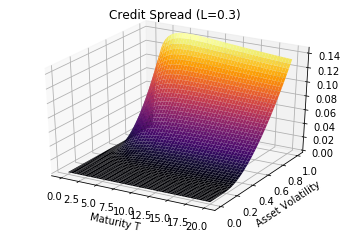

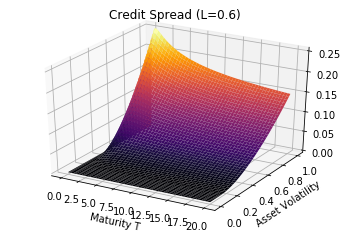

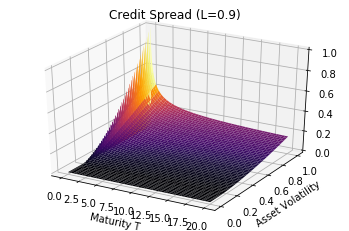

In [12]:
from mpl_toolkits import mplot3d
r=0.05
t=0
T=5
sigma=0.25
L=np.array([0.3,0.6,0.9])
sigmas=np.linspace(0.001,1,1000)
Ts=np.linspace(0.001,20,1000)
X,Y=np.meshgrid(Ts,sigmas)
Z = list(map(lambda i: credit_spread(X,t,Y,r,L[i]), range(3)))

for i in range(3):
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    ax.plot_surface(X, Y, Z[i], cmap='inferno')
    ax.set_xlabel('Maturity T')
    ax.set_ylabel('Asset Volatility')
    ax.set_title('Credit Spread (L='+str(L[i])+')');
    plt.show()

# Exercise 2

In [13]:
P = np.array([[0.95 , 0.05 , 0 , 0],[0.05 , 0.8 , 0.1 , 0.05],[0 , 0.2 , 0.5 , 0.3],[0 , 0 , 0 , 1]])

In [14]:
mu = [0.2 , 0.15 , 0.1]
sig = [0.3 , 0.25 , 0.2]
V_0 = 100

In [15]:
d = [[],[],[]]
for j in range(3):
    p = P[j][3]
    for i in range(3):
        d[j].append(V_0 * np.exp(sig[j] * stats.norm.ppf(p) + mu[j] - 1/2 * sig[j]**2))
        p = p + P[j][2-i]

In [16]:
print(np.around(d,2))

[[   0.      0.     71.29]
 [  74.64   86.9   169.89]
 [  97.54  128.19     inf]]
